In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import scikitplot as skplt
from sklearn.metrics import precision_recall_curve as prc
from scipy import stats

In [6]:
clf = MLPClassifier(solver='adam', alpha=0.0001, learning_rate='constant', learning_rate_init=0.01, max_iter=200,
                       activation='logistic', momentum=0.9, verbose=False, tol=0.0001)

In [7]:
df = pd.read_csv('dados 0001.csv',index_col='Unnamed: 0')

In [27]:
target = pd.read_csv('target 0001.csv',index_col='Unnamed: 0')

In [44]:
target['A'] = pd.to_numeric(target['A'])
target = target.drop('B',axis=1)

KeyError: "labels ['B'] not contained in axis"

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=1)

In [46]:
clf.fit(X_train, y_train)

C:\Users\Gerso\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [47]:
from sklearn.metrics import confusion_matrix 

In [48]:
saidas = pd.DataFrame(clf.predict(X_test),columns=['A'])

In [49]:
print('-----------------------------------------------------------')

print('Saida da rede: ', saidas)
print('Saida desejada: ', y_test)

print('-----------------------------------------------------------')

print('Score: ', clf.score(X_test, y_test))

-----------------------------------------------------------
('Saida da rede: ',      A
0    1
1    0
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    0
10   1
11   1
12   1
13   0
14   1
15   1
16   1
17   1
18   1
19   1
20   1
21   1
22   1
23   0
24   1
25   1
26   1
27   1
28   0
29   1
..  ..
932  1
933  1
934  1
935  1
936  1
937  1
938  1
939  1
940  1
941  1
942  1
943  1
944  1
945  1
946  0
947  1
948  1
949  1
950  1
951  1
952  1
953  1
954  1
955  1
956  1
957  1
958  0
959  1
960  1
961  0

[962 rows x 1 columns])
('Saida desejada: ',       A
3228  0
4142  0
4691  0
3682  0
1891  1
3853  0
1999  1
4232  0
3978  0
4267  0
4116  0
2385  1
556   1
3817  0
3611  0
3490  0
3142  0
3752  0
2456  0
4303  0
2537  0
3057  0
2321  1
4087  0
1621  1
636   1
1725  1
3154  0
4340  0
2068  1
...  ..
2769  0
1344  1
1772  1
1785  1
3468  0
2229  1
2739  0
3516  0
854   1
643   1
4289  0
957   1
1946  1
2544  0
3163  0
2105  1
2595  0
613   1
290   1
4070  0
2555  0
3888  0
3137  0


In [50]:
result = confusion_matrix(y_test, y_pred)

print('Positive/Positive (OK):', result[0][0])
print('Positive/Negativo (ER):', result[0][1])
print('Negativo/Positivo (ER):', result[1][0])
print('Negativo/Negativo (OK):', result[1][0])
result

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

C:\Users\Gerso\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


ValueError: max must be larger than min in range parameter.

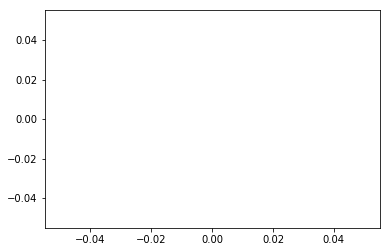

In [51]:
sns.distplot(y_test-saidas,bins=50)

KstestResult(statistic=0.5, pvalue=0.0)


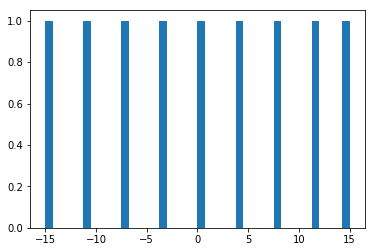

In [25]:
x = np.linspace(-15, 15, 9)
print stats.kstest(saidas['B'], 'norm')
plt.hist(x,bins=40)
plt.show()